# Aggregation and Grouping

When undertaking Data Analysis you often will need to do the following tasks:

* Change the shape of a dataframe so that it is easier to interpret and manipulate.
* Group the information in the dataframe based on categories of one or more features.
* Calculate aggregated information for a dataframe based on groupings.

The simplest example of this is calculating a Pivot Table in Excel. To perform similar manipulations in Python, Pandas provides the routines `melt()`, `pivot()`, `pivot_table()`, `crosstab()` and `groupby()`. In this lesson we will consider some simple examples of how each of these can be used. To do this we will two datasets: information on Covid-19 in Australia, and the `penguins` dataset from `seaborn`.

We first import the required libaries. As `seaborn` does not have a routine for `area` plots, we will use `matplotlib`, but set the style to emulate `seaborn`.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('seaborn')

## Contents

* Reshaping data
* Creating Pivot Tables
* Groupby
* Exercises

## Reshaping data

We have already seen examples of reshaping data with the `flights` dataset when we considered `seaborn` plotting. However, here we will explain `pivot()` and `melt()` in more detail using Australian Covid-19 dataset from https://www.covid19data.com.au/. The original data detailed the cumulative cases, deaths and tests since the beginning of January 2020. By taking the difference between successive days, this has been manipulated to give the daily count of each of these features. As we will see the data requires some elementary cleaning.

The data is in a `csv` (comma separated values) file, so we can load it into a dataframe using `pd.read_csv()`. If we print the information about the dataframe using `df.info()`, this details the datatype of each column and the number of entries.

In [7]:
auscovid = pd.read_csv('HistoricalCases.csv')
auscovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3552 non-null   object 
 1   State   3552 non-null   object 
 2   Cases   3552 non-null   float64
 3   Deaths  3552 non-null   float64
 4   Tests   3552 non-null   float64
dtypes: float64(3), object(2)
memory usage: 138.9+ KB


Plotting the first 14 lines of the dataframe shows that the records cycle through the states first, then through the dates. This indicates that the data has two indicies: `State` and `Date`.

In [8]:
auscovid.head(14)

,Date,State,Cases,Deaths,Tests
0,2020-01-23,ACT,0.0,0.0,0.0
1,2020-01-23,NSW,0.0,0.0,0.0
2,2020-01-23,NT,0.0,0.0,0.0
3,2020-01-23,QLD,0.0,0.0,0.0
4,2020-01-23,SA,0.0,0.0,0.0
5,2020-01-23,TAS,0.0,0.0,0.0
6,2020-01-23,VIC,0.0,0.0,0.0
7,2020-01-23,WA,0.0,0.0,0.0
8,2020-01-25,ACT,0.0,0.0,0.0
9,2020-01-25,NSW,0.0,0.0,0.0


In the representation above, it hard to see what is going on for any one state. A better way to represent the data is as a table, with the dates as the rows and the states as the columns. However, we can only put one field in this table. For the moment we will just consider the number of cases. This can be created using `df.pivot()`, as in the following cell. 

In [10]:
auscovid_wide = auscovid.pivot('Date', 'State', values='Cases')#first is column(up and down), second is row(left to right)
auscovid_wide

State,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
Date,,,,,,,,
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-04-11,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The reverse process of `df.pivot()` is `df.melt()`. `auscovid_wide` can therefore be transformed back to long format in the following cell.

In [6]:
auscovid_wide.melt(value_vars=['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'], ignore_index=False)
#data frame is now grouped by state

,State,value
Date,,
2020-01-23,ACT,0.0
2020-01-25,ACT,0.0
2020-01-27,ACT,0.0
2020-01-28,ACT,0.0
2020-01-29,ACT,0.0
...,...,...
2021-04-11,WA,0.0
2021-04-12,WA,0.0
2021-04-13,WA,0.0


Using `df.describe()` we can view the descriptive statistics for the numerical fields. Here we can see there are negative values, when all values should be positive, and some clear examples of outliers, where the values are significantly outside of the range we would expect from the mean and standard deviation.

In [5]:
auscovid.describe()

,Cases,Deaths,Tests
count,3552.000000,3552.000000,3552.000000
mean,8.146959,0.254786,4465.681306
std,49.622555,1.997493,28835.413018
min,-996.000000,-1.000000,-923200.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1000.500000
max,1002.000000,59.000000,988200.000000


We can now clean the data. If we create a box and whisker plot we can see clear outliers in the `QLD` data, and occurences of negative values for the cases, when all should be positive.

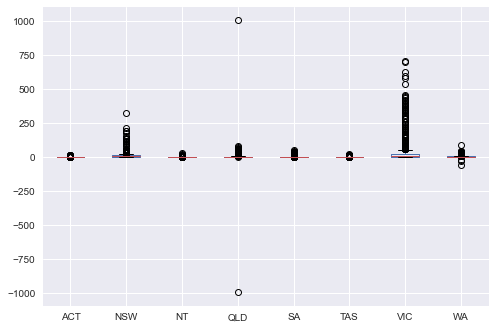

In [7]:
auscovid_wide.boxplot();

This can be fixed by creating a mask which sets the values to 0 for any day which are greater than 900 or less than 0. 

In [9]:
auscovid_wide[(auscovid_wide < 0) | (auscovid_wide > 900)] = 0

In [23]:
#a=(auscovid_wide.sum(axis=0).sort_values(ascending=False))#axis=0 represents row
#a

State
VIC    20423.0
NSW     5040.0
QLD     1450.0
WA       925.0
SA       654.0
TAS      222.0
ACT      117.0
NT       107.0
dtype: float64

In [24]:
a.index

Index(['VIC', 'NSW', 'QLD', 'WA', 'SA', 'TAS', 'ACT', 'NT'], dtype='object', name='State')

Now lets investigate how the total number of cases varies over time and by state.

To do so, the data can be plotted as a stacked `area` plot. We set the order of the plots so that there are plotted by decreasing number of total cases. 

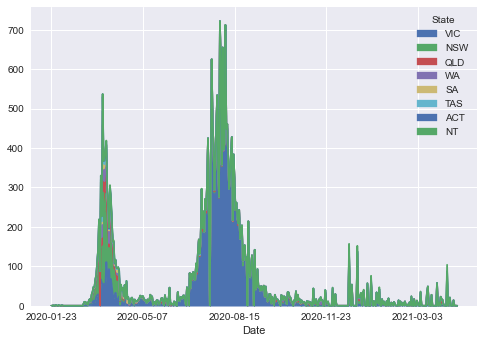

In [31]:
auscovid_wide[(auscovid_wide < 0) | (auscovid_wide > 900)] = 0

order_by_total_cases = (auscovid_wide.sum(axis = 0).sort_values(ascending=False).index) #getting order

auscovid_wide.plot.area(y=order_by_total_cases);

In [28]:
# breaking down the previous cell

#auscovid_wide.sum(axis = 0)
#auscovid_wide.sum(axis = 0).sort_values(ascending=False)
#auscovid_wide.sum(axis = 0).sort_values(ascending=False).index
auscovid_wide.plot.area

<bound method PlotAccessor.area of <pandas.plotting._core.PlotAccessor object at 0x0000020BD3AC2D00>>

There is still significant variations in the data, so we can take a rolling 5 day average of the data to even out those variations. A rolling average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles.

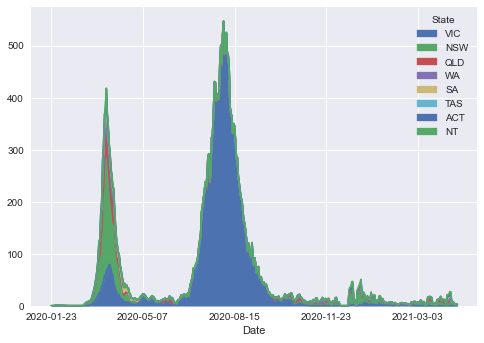

In [38]:
auscovid_rolling = auscovid_wide.rolling(window=5).mean()
auscovid_rolling.plot.area(y=order_by_total_cases);

Finally, the field that is typically of interest is the total number of cases on each day since the beginning of the epidemic the cumulative sum of the data can be plotted. This can be created using the function `cumsum()`.

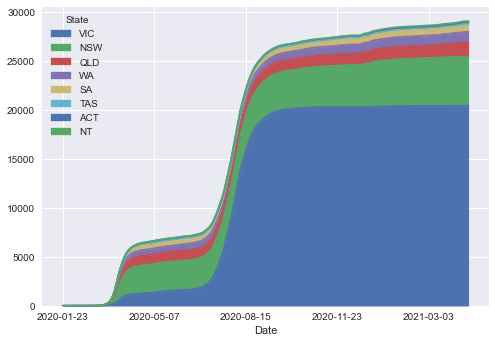

In [41]:
auscovid_rolling.cumsum().plot.area(y=order_by_total_cases);

In [43]:
#breaking down the previous cell

auscovid_wide.head(10)

State,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
Date,,,,,,,,
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-01-30,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [45]:
auscovid_rolling = auscovid_wide.rolling(window=5).mean() #auscovid_rolling
auscovid_rolling.head(10)

State,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
Date,,,,,,,,
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0
2020-01-30,0.0,0.2,0.0,0.4,0.0,0.0,0.2,0.0
2020-01-31,0.0,0.2,0.0,0.4,0.0,0.0,0.2,0.0
2020-02-01,0.0,0.0,0.0,0.4,0.0,0.0,0.2,0.0
2020-02-02,0.0,0.0,0.0,0.4,0.4,0.0,0.2,0.0


In [46]:
x = auscovid_rolling.cumsum()
x.head(10)

State,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
Date,,,,,,,,
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0
2020-01-30,0.0,0.4,0.0,0.6,0.0,0.0,0.2,0.0
2020-01-31,0.0,0.6,0.0,1.0,0.0,0.0,0.4,0.0
2020-02-01,0.0,0.6,0.0,1.4,0.0,0.0,0.6,0.0
2020-02-02,0.0,0.6,0.0,1.8,0.4,0.0,0.8,0.0


## Creating Pivot Tables

`df.pivot()` and `df.melt()` only allow the user to reshape dataframes based on categories. This is limiting as we could only manipulate one of the values. The routine `pd.pivot_table()` or `df.pivot_table()` allow us to view descriptive statistics based on *multiple* categories for a dataframe. These are the same routine, except in the former the dataframe needs to be passed as an argument. 

For example, if we want to view the mean values of all fields for each state, then we can use `df.pivot_table()` and specify `index='State'` in the following cell.

In [39]:
auscovid.pivot_table(index='State', values=['Cases', 'Deaths', 'Tests']).round()#round()nearest int

,Cases,Deaths,Tests
State,,,
ACT,0.0,0.0,389.0
NSW,11.0,0.0,12326.0
NT,0.0,0.0,340.0
QLD,3.0,0.0,5168.0
SA,1.0,0.0,2658.0
TAS,0.0,0.0,429.0
VIC,46.0,2.0,12270.0
WA,2.0,0.0,2146.0


If we want to find the maximum value for each field, we can change the aggregator function. In this case the argument for `aggfunc` can be specified as a string or as a function such as `np.max`. From this we can again observe the problems with outliers for the cases for Queensland.

In [40]:
pd.pivot_table(auscovid, index='State', values=['Cases', 'Deaths', 'Tests'], 
                                 aggfunc='max').astype(int)

,Cases,Deaths,Tests
State,,,
ACT,13,1,107904
NSW,325,5,988200
NT,26,0,59515
QLD,1002,1,528915
SA,47,1,115063
TAS,22,2,74698
VIC,700,59,317968
WA,88,2,90474


In [47]:
#auscovid.pivot_table(index='State', values=['Cases', 'Deaths', 'Tests'],aggfunc='max').round()

,Cases,Deaths,Tests
State,,,
ACT,13.0,1.0,107904.0
NSW,325.0,5.0,988200.0
NT,26.0,0.0,59515.0
QLD,1002.0,1.0,528915.0
SA,47.0,1.0,115063.0
TAS,22.0,2.0,74698.0
VIC,700.0,59.0,317968.0
WA,88.0,2.0,90474.0


Another feature that we may want to view is the national statistics. This can be created for each day by summing over all the states. To do this we set `index='Date'` and `aggfunc='sum'`, and then show an ordered, random sample of this dataframe.

In [54]:
auscovid_national = auscovid.pivot_table(index='Date', values=['Cases', 'Deaths', 'Tests'], 
                                   aggfunc='sum')
#auscovid_national
auscovid_national.sample(10).sort_values(by=['Date']).astype(int)

,Cases,Deaths,Tests
Date,,,
2020-03-03,4,0,0
2020-04-03,222,4,19327
2020-05-10,12,0,0
2020-05-14,15,0,25666
2020-08-24,114,15,-426110
2020-08-26,154,24,631532
2020-11-04,11,0,43966
2021-01-08,0,0,0
2021-01-30,19,0,123384


To explore Pivot Tables in more detail we can use the `penguins` dataset from `seaborn`. 

In [55]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [59]:
penguins.island.unique()
penguins.species.unique()
penguins.body_mass_g.unique()

array([3750., 3800., 3250.,   nan, 3450., 3650., 3625., 4675., 3475.,
       4250., 3300., 3700., 3200., 4400., 4500., 3325., 4200., 3400.,
       3600., 3950., 3550., 3150., 3900., 4150., 4650., 3100., 3000.,
       4600., 3425., 2975., 3500., 4300., 4050., 2900., 2850., 3350.,
       4100., 3050., 4450., 4000., 4700., 4350., 3725., 4725., 3075.,
       2925., 3175., 4775., 3825., 4275., 4075., 3775., 3875., 3275.,
       4475., 3975., 3525., 3575., 4550., 3850., 4800., 2700., 3675.,
       5700., 5400., 5200., 5150., 5550., 5850., 6300., 5350., 5000.,
       5050., 5100., 5650., 5250., 6050., 4950., 4750., 4900., 5300.,
       4850., 5800., 6000., 5950., 4625., 5450., 5600., 4875., 4925.,
       4975., 5500., 4575., 4375., 5750.])

As a simple example consider that we want to find the number for each species on each island. Therefore we need to set the values to any one of the features, here we choose `'body_mass_g'`, the index to `index='species'`, the columns to `columns='island'` and `aggfunc='max'`. We use `fillna(0)` to convert empty entries to 0.

In [43]:
penguins.pivot_table('body_mass_g', index='species', columns='island', 
                                   aggfunc='count').fillna(0).astype(int) #can supply variables other than body mass

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,51
Chinstrap,0,68,0
Gentoo,123,0,0


All of the fields can have multiple values. In this example we find the minumum and maximum values of the body mass, and set the indices to be `species` and `sex`. The fields with `NaN` are those for which there are no species of that penguin of that island.

In [61]:
penguins.pivot_table('body_mass_g', index=['species','sex'], columns='island', 
                                   aggfunc=['min', 'max']).round()

min                       max                  
island            Biscoe   Dream Torgersen  Biscoe   Dream Torgersen
species   sex                                                       
Adelie    Female  2850.0  2900.0    2900.0  3900.0  3700.0    3800.0
          Male    3550.0  3425.0    3325.0  4775.0  4650.0    4700.0
Chinstrap Female     NaN  2700.0       NaN     NaN  4150.0       NaN
          Male       NaN  3250.0       NaN     NaN  4800.0       NaN
Gentoo    Female  3950.0     NaN       NaN  5200.0     NaN       NaN
          Male    4750.0     NaN       NaN  6300.0     NaN       NaN

Numerical values can also be used to categorize the features. First we need to bin the numerical feature into equally spaced bins with `pd.cut()`. In this cell we investigate how the mean value of the body mass varies with bill length, `species` and `island`.

In [45]:
#pd.cut?

In [75]:
bill_length = pd.cut(penguins['bill_length_mm'],2, precision=2) # 2 is number of bins
penguins.pivot_table('body_mass_g', index=['species', bill_length], columns='island', 
                                   aggfunc='mean').round()
#bill_length

island                    Biscoe   Dream  Torgersen
species   bill_length_mm                           
Adelie    (32.07, 45.85]  3710.0  3688.0     3696.0
          (45.85, 59.6]      NaN     NaN     4200.0
Chinstrap (32.07, 45.85]     NaN  3446.0        NaN
          (45.85, 59.6]      NaN  3801.0        NaN
Gentoo    (32.07, 45.85]  4696.0     NaN        NaN
          (45.85, 59.6]   5259.0     NaN        NaN

Similar manipulations of the data can be done with `pd.crosstab()`. By including `margins=True` this will also include subtotals of the rows and columns.

In [77]:
pd.crosstab(penguins.species, penguins.island, margins = True, margins_name = "Subtotal").round()

island,Biscoe,Dream,Torgersen,Subtotal
species,,,,
Adelie,44,56,52,152
Chinstrap,0,68,0,68
Gentoo,124,0,0,124
Subtotal,168,124,52,344


## Groupby

The `df.groupby()` method provides a general method for performing all of the above manipulations, and for extending these. This applies the `split-apply-combine` operation, where data is split based on categories, an operation is applied to the groups and then these are combined to provide aggregated properties.

As an example consider that we want to obtain a count of penguins based on `species`, `sex` and `island`. Then the first step is to split the data based on these categories. We can look at the names of the 10 groups (since Chinstrap and Gentoo each only occur on one island). 

In [78]:
grouped = penguins.groupby(['species', 'sex', 'island'])

for name, group in grouped:
    print(name)

('Adelie', 'Female', 'Biscoe')
('Adelie', 'Female', 'Dream')
('Adelie', 'Female', 'Torgersen')
('Adelie', 'Male', 'Biscoe')
('Adelie', 'Male', 'Dream')
('Adelie', 'Male', 'Torgersen')
('Chinstrap', 'Female', 'Dream')
('Chinstrap', 'Male', 'Dream')
('Gentoo', 'Female', 'Biscoe')
('Gentoo', 'Male', 'Biscoe')


Then for one of the features, here we again choose body mass, we can count the number of entries in each group and display the answer. The default here is to print the answer in long format.

In [49]:
grouped['body_mass_g'].count()

species    sex     island   
Adelie     Female  Biscoe       22
                   Dream        27
                   Torgersen    24
           Male    Biscoe       22
                   Dream        28
                   Torgersen    23
Chinstrap  Female  Dream        34
           Male    Dream        34
Gentoo     Female  Biscoe       58
           Male    Biscoe       61
Name: body_mass_g, dtype: int64

We could also display the calculation in wide format, by using the method `unstack()`.

In [80]:
grouped['body_mass_g'].count().unstack()

island            Biscoe  Dream  Torgersen
species   sex                             
Adelie    Female    22.0   27.0       24.0
          Male      22.0   28.0       23.0
Chinstrap Female     NaN   34.0        NaN
          Male       NaN   34.0        NaN
Gentoo    Female    58.0    NaN        NaN
          Male      61.0    NaN        NaN

To display the descriptive statistics of the body mass of penguins based on `species` and `sex`, we first group by these two categories and the apply the method `df.describe()` to the groups.

In [85]:
grouped = penguins.groupby(['species', 'sex'])
grouped['body_mass_g'].describe().round()

count    mean    std     min     25%     50%     75%     max
species   sex                                                                 
Adelie    Female   73.0  3369.0  269.0  2850.0  3175.0  3400.0  3550.0  3900.0
          Male     73.0  4043.0  347.0  3325.0  3800.0  4000.0  4300.0  4775.0
Chinstrap Female   34.0  3527.0  285.0  2700.0  3362.0  3550.0  3694.0  4150.0
          Male     34.0  3939.0  362.0  3250.0  3731.0  3950.0  4100.0  4800.0
Gentoo    Female   58.0  4680.0  282.0  3950.0  4462.0  4700.0  4875.0  5200.0
          Male     61.0  5485.0  313.0  4750.0  5300.0  5500.0  5700.0  6300.0

We can apply `df.groupby()` to the Covid-19 data. Here we group by `State` and plot the descriptive statistics for each field. This is in wide format, and so, is difficult to view.

In [87]:
grouped = auscovid.groupby(['State'])
grouped.describe().round()

Cases                                             Deaths       ...  \
       count  mean    std    min  25%  50%   75%     max  count mean  ...   
State                                                                 ...   
ACT    444.0   0.0    1.0    0.0  0.0  0.0   0.0    13.0  444.0  0.0  ...   
NSW    444.0  11.0   30.0   -3.0  0.0  4.0   9.0   325.0  444.0  0.0  ...   
NT     444.0   0.0    2.0   -1.0  0.0  0.0   0.0    26.0  444.0  0.0  ...   
QLD    444.0   3.0   68.0 -996.0  0.0  0.0   1.0  1002.0  444.0  0.0  ...   
SA     444.0   1.0    6.0   -4.0  0.0  0.0   0.0    47.0  444.0  0.0  ...   
TAS    444.0   0.0    2.0    0.0  0.0  0.0   0.0    22.0  444.0  0.0  ...   
VIC    444.0  46.0  111.0   -2.0  0.0  2.0  21.0   700.0  444.0  2.0  ...   
WA     444.0   2.0    8.0  -62.0  0.0  0.0   2.0    88.0  444.0  0.0  ...   

                  Tests                                                    \
       75%   max  count     mean      std       min  25%     50%      75%   
State                                                                       
ACT    0.0   1.0  444.0    389.0   5233.0   -4055.0  0.0     0.0      0.0   
NSW    0.0   5.0  444.0  12326.0  66988.0 -923200.0  0.0  3000.0  18892.0   
NT     0.0   0.0  444.0    340.0   3689.0       0.0  0.0     0.0      0.0   
QLD    0.0   1.0  444.0   5168.0  36003.0 -467722.0  0.0     0.0   2018.0   
SA     0.0   1.0  444.0   2658.0  11218.0  -37500.0  0.0     0.0      0.0   
TAS    0.0   2.0  444.0    429.0   4288.0   -4302.0  0.0     0.0      0.0   
VIC    0.0  59.0  444.0  12270.0  21246.0   -7762.0  0.0  7690.0  17291.0   
WA     0.0   2.0  444.0   2146.0   7912.0  -76664.0  0.0     0.0   2332.0   

                 
            max  
State            
ACT    107904.0  
NSW    988200.0  
NT      59515.0  
QLD    528915.0  
SA     115063.0  
TAS     74698.0  
VIC    317968.0  
WA      90474.0  

[8 rows x 24 columns]

In this case it is better to view the dataframe in long format, by using the method `stack()`. However, that also has problems if there are too many rows.

In [89]:
grouped.describe().round().stack()

Cases  Deaths    Tests
State                              
ACT   count  444.0   444.0    444.0
      mean     0.0     0.0    389.0
      std      1.0     0.0   5233.0
      min      0.0     0.0  -4055.0
      25%      0.0     0.0      0.0
...            ...     ...      ...
WA    min    -62.0     0.0 -76664.0
      25%      0.0     0.0      0.0
      50%      0.0     0.0      0.0
      75%      2.0     0.0   2332.0
      max     88.0     2.0  90474.0

[64 rows x 3 columns]

The aggregation does not need to be a single argument. Using the argument `aggregate()` multiple aggregation functions can be applied. In the following cell, we calculate the minimum and maximum value over each group, and using `np.argmin()` and `np.argmax()`, the positions in the dataframe at which these occur.

In [90]:
grouped = auscovid.groupby(['State'])
grouped[['Cases', 'Deaths', 'Tests']].aggregate([np.argmin, 'min', np.argmax, 'max']).round()

Cases                       Deaths                    Tests            \
      argmin    min argmax     max argmin  min argmax   max argmin       min   
State                                                                          
ACT      0.0    0.0   55.0    13.0    0.0  0.0   62.0   1.0   65.0   -4055.0   
NSW    120.0   -3.0   56.0   325.0   77.0 -1.0   91.0   5.0  164.0 -923200.0   
NT      75.0   -1.0  325.0    26.0    0.0  0.0    0.0   0.0    0.0       0.0   
QLD    379.0 -996.0  381.0  1002.0   76.0 -1.0   57.0   1.0  209.0 -467722.0   
SA     119.0   -4.0  432.0    47.0    0.0  0.0   71.0   1.0   80.0  -37500.0   
TAS      0.0    0.0   76.0    22.0    0.0  0.0   94.0   2.0  120.0   -4302.0   
VIC    272.0   -2.0  190.0   700.0    0.0  0.0  220.0  59.0  158.0   -7762.0   
WA      32.0  -62.0   53.0    88.0    0.0  0.0   70.0   2.0  128.0  -76664.0   

                        
      argmax       max  
State                   
ACT    381.0  107904.0  
NSW    165.0  988200.0  
NT     432.0   59515.0  
QLD    211.0  528915.0  
SA     393.0  115063.0  
TAS    349.0   74698.0  
VIC    334.0  317968.0  
WA     129.0   90474.0

The `groupby()` method has much more capability than outlined here. For example, user defined functions could be applied to each group or groups can be filtered based on aggregated properties.

## Exercises

For these exercises we will use the `titanic` dataset from `seaborn`.

In [122]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [109]:
titanic.survived.unique()
titanic.shape

(891, 15)

In [138]:
titanic[titanic.age>0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Exercise 1

Create a Pivot Table which shows the number of people that embarked at each port categorized on `class` and `sex`. 

In [130]:
titanic.pivot_table('survived', index='embark_town', columns=('class','sex'),
                                   aggfunc='count').fillna(0).astype(int)

class        First      Second       Third     
sex         female male female male female male
embark_town                                    
Cherbourg       43   42      7   10     23   43
Queenstown       1    1      2    1     33   39
Southampton     48   79     67   97     88  265

### Exercise 2

In [131]:
titanic.pivot_table('fare', index='embark_town', columns=('class','sex'),
                                   aggfunc=['min','max']).fillna(0).astype(int)

min                                 max                   \
class        First      Second       Third       First      Second        
sex         female male female male female male female male female male   
embark_town                                                               
Cherbourg       27   26     12   12      7    4    512  512     41   41   
Queenstown      90   90     12   12      6    6     90   90     12   12   
Southampton     25    0     10    0      7    0    263  263     65   73   

                         
class        Third       
sex         female male  
embark_town              
Cherbourg       22   21  
Queenstown      29   29  
Southampton     69   69

Modify the table to show the minumum and maximum fares based on the same categorizations.

### Exercise 3

Use `df.groupby()` to show the descriptive statistics of the age of passengers based on their sex and whether or not they survived.

In [154]:
g=titanic.groupby([ 'sex', 'survived','age'])
g['age'].describe().round()

count  mean  std   min   25%   50%   75%   max
sex    survived age                                                 
female 0        2.0     4.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0
                3.0     1.0   3.0  NaN   3.0   3.0   3.0   3.0   3.0
                6.0     1.0   6.0  NaN   6.0   6.0   6.0   6.0   6.0
                8.0     1.0   8.0  NaN   8.0   8.0   8.0   8.0   8.0
                9.0     4.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0
...                     ...   ...  ...   ...   ...   ...   ...   ...
male   1        52.0    1.0  52.0  NaN  52.0  52.0  52.0  52.0  52.0
                56.0    1.0  56.0  NaN  56.0  56.0  56.0  56.0  56.0
                60.0    1.0  60.0  NaN  60.0  60.0  60.0  60.0  60.0
                62.0    1.0  62.0  NaN  62.0  62.0  62.0  62.0  62.0
                80.0    1.0  80.0  NaN  80.0  80.0  80.0  80.0  80.0

[216 rows x 8 columns]

### Exercise 4

Use `pd.cut` to bin the ages into four equal bins. Then use `df.groupby()` to show the number of survivors based on these age bins, their sex and class.

In [152]:
agebin=pd.cut(titanic['age'],4, precision=4)
grouped = titanic.groupby([agebin, 'sex','class'])
grouped['age'].describe().round()

count  mean  std   min   25%   50%   75%   max
age              sex    class                                                 
(0.3404, 20.315] female First    14.0  16.0  4.0   2.0  16.0  17.0  18.0  19.0
                        Second   16.0  11.0  7.0   2.0   5.0  10.0  17.0  19.0
                        Third    47.0  11.0  7.0   1.0   4.0  13.0  18.0  20.0
                 male   First     7.0  13.0  8.0   1.0   8.0  17.0  18.0  19.0
                        Second   19.0  11.0  8.0   1.0   2.0  16.0  18.0  19.0
                        Third    76.0  14.0  6.0   0.0   9.0  17.0  19.0  20.0
(20.315, 40.21]  female First    45.0  31.0  6.0  21.0  24.0  31.0  36.0  40.0
                        Second   45.0  30.0  5.0  21.0  25.0  29.0  34.0  40.0
                        Third    46.0  28.0  5.0  21.0  23.0  27.0  31.0  40.0
                 male   First    44.0  32.0  6.0  21.0  27.0  32.0  36.0  40.0
                        Second   59.0  30.0  5.0  21.0  25.0  30.0  34.0  39.0
                        Third   146.0  28.0  5.0  20.0  24.0  28.0  32.0  40.0
(40.21, 60.105]  female First    24.0  50.0  5.0  41.0  46.0  50.0  54.0  60.0
                        Second   13.0  48.0  5.0  41.0  44.0  48.0  50.0  57.0
                        Third     8.0  44.0  3.0  41.0  42.0  45.0  46.0  48.0
                 male   First    38.0  50.0  5.0  42.0  46.0  49.0  54.0  60.0
                        Second   18.0  50.0  6.0  42.0  44.0  50.0  54.0  60.0
                        Third    27.0  46.0  5.0  40.0  42.0  44.0  48.0  59.0
(60.105, 80.0]   female First     2.0  62.0  1.0  62.0  62.0  62.0  63.0  63.0
                        Third     1.0  63.0  NaN  63.0  63.0  63.0  63.0  63.0
                 male   First    12.0  66.0  6.0  61.0  62.0  64.0  70.0  80.0
                        Second    3.0  66.0  4.0  62.0  64.0  66.0  68.0  70.0
                        Third     4.0  68.0  6.0  61.0  64.0  68.0  71.0  74.0